In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing  import StandardScaler,LabelEncoder
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor


from sklearn.metrics import r2_score,root_mean_squared_error
import joblib

import warnings
warnings.filterwarnings("ignore")

In [84]:
df = pd.read_csv('/Users/saptarshipal/DATA/used_car_price_prediction/data/vehicles.csv')
df1 = df.copy()
print(df1.shape)
print(df1.columns)


(426880, 26)
Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')


In [85]:
df1.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [86]:
df1.drop(columns = ['id','url','region_url','VIN','image_url','description','state', 'lat', 'long','posting_date'],axis = 1,inplace =True)

In [87]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   price         426880 non-null  int64  
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   model         421603 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      422480 non-null  float64
 9   title_status  418638 non-null  object 
 10  transmission  424324 non-null  object 
 11  drive         296313 non-null  object 
 12  size          120519 non-null  object 
 13  type          334022 non-null  object 
 14  paint_color   296677 non-null  object 
 15  county        0 non-null       float64
dtypes: float64(3), int64(1), object(12)
memory usage: 52.1+ MB


# Dropping null values

In [88]:
df1.isnull().sum()

region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive           130567
size            306361
type             92858
paint_color     130203
county          426880
dtype: int64

In [89]:
# calculating percentage null values in each column
df1.isna().mean()

region          0.000000
price           0.000000
year            0.002823
manufacturer    0.041337
model           0.012362
condition       0.407852
cylinders       0.416225
fuel            0.007058
odometer        0.010307
title_status    0.019308
transmission    0.005988
drive           0.305863
size            0.717675
type            0.217527
paint_color     0.305011
county          1.000000
dtype: float64

In [90]:
# dropping columns which have more than 25% null values

null_columns = df1.columns[df1.isnull().mean()>0.25]
df1.drop(columns = null_columns,axis =1,inplace=True)

In [91]:
cat_cols = df1.columns[df1.dtypes == 'object']
num_cols = df1.columns[df1.dtypes != 'object']
print(f'The categorical columns are {cat_cols}.\n\n')
print(f'The numerical columns are {num_cols}.\n\n')

The categorical columns are Index(['region', 'manufacturer', 'model', 'fuel', 'title_status',
       'transmission', 'type'],
      dtype='object').


The numerical columns are Index(['price', 'year', 'odometer'], dtype='object').




In [92]:
df1[cat_cols].isna().sum()

region              0
manufacturer    17646
model            5277
fuel             3013
title_status     8242
transmission     2556
type            92858
dtype: int64

In [93]:
df1[cat_cols].columns[df1[cat_cols].isna().sum().sort_values(ascending=False)>10000]

Index(['region', 'manufacturer'], dtype='object')

In [94]:
df1.drop(columns = ['region', 'manufacturer', 'model', 'fuel'],axis =1, inplace=True)

In [95]:
df1[num_cols].isnull().sum().sort_values(ascending=False)

odometer    4400
year        1205
price          0
dtype: int64

In [96]:
df1.drop(df1[df1['odometer'].isnull()].index,axis = 0,inplace =True)
df1.drop(df1[df1['type'].isnull()].index,axis = 0,inplace =True)
df1.drop(df1[df1['title_status'].isnull()].index,axis = 0,inplace =True)
df1.drop(df1[df1['year'].isnull()].index,axis = 0,inplace =True)
df1.drop(df1[df1['transmission'].isnull()].index,axis = 0,inplace =True)


In [97]:
df1.isnull().sum()

price           0
year            0
odometer        0
title_status    0
transmission    0
type            0
dtype: int64

# EDA

In [98]:
df1.dtypes

price             int64
year            float64
odometer        float64
title_status     object
transmission     object
type             object
dtype: object

In [99]:
# changing the data type of the year column.

df1['year'] = df1['year'].astype(int)

In [100]:
# dropping rows with price 0 to 100 as they are very low prices and seem incorrect.

df1.drop(df1[(df1['price']>=0)&(df1['price']<=100)].index,axis =0,inplace=True)

In [101]:
round(df1.describe())


,price,year,odometer
count,2.951620e+05,295162.0,295162.0
mean,4.367600e+04,2012.0,91512.0
std,7.648675e+06,9.0,158929.0
min,1.010000e+02,1900.0,0.0
25%,8.250000e+03,2009.0,34413.0
50%,1.699000e+04,2014.0,80465.0
75%,2.890000e+04,2017.0,129659.0
max,3.736929e+09,2022.0,10000000.0


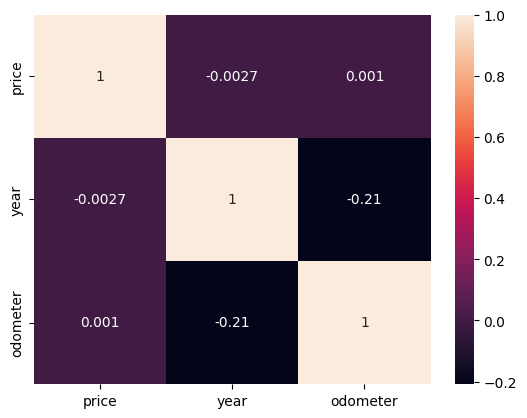

In [102]:
sns.heatmap(df1[['price','year','odometer']].corr(),annot =True)
plt.show()

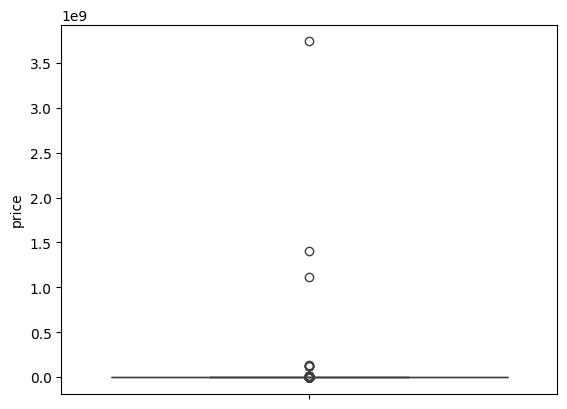

In [103]:
sns.boxplot(df1['price'])
plt.show()

In [104]:
df1[df1['price'] >= 249999].sort_values(by='price',ascending=False)

,price,year,odometer,title_status,transmission,type
318592,3736928711,2007,164000.0,clean,automatic,pickup
184704,1410065407,1989,103000.0,clean,manual,SUV
29386,1111111111,1999,149000.0,clean,automatic,pickup
230753,135008900,2008,110500.0,clean,automatic,truck
137807,123456789,1999,96000.0,clean,automatic,sedan
193736,123456789,2015,64181.0,clean,automatic,sedan
207080,123456789,2003,1234567.0,clean,automatic,pickup
307488,123456789,1996,320000.0,clean,automatic,pickup
136516,17000000,2007,170000.0,rebuilt,automatic,pickup
303014,12345678,2019,100000.0,clean,automatic,truck


In [105]:
# removing outliers

df1.drop(df1[df1['price'] >= 249999].index,axis =0,inplace =True)

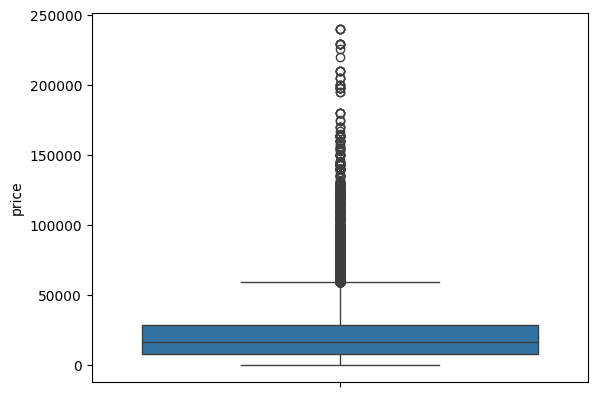

In [106]:
sns.boxplot(df1['price'])
plt.show()

In [107]:
df1['type'].unique()

array(['pickup', 'truck', 'other', 'coupe', 'SUV', 'hatchback',
       'mini-van', 'sedan', 'offroad', 'bus', 'convertible', 'wagon',
       'van'], dtype=object)

# Encoding

In [108]:
def year_categ(number):
    
    if number <= 1945:
        return 'ancient'
    elif number >1945 and number <= 1980:
        return 'old'
    elif number >1980 and number <= 2015:
        return 'middle'
    else:
        return 'new'

In [109]:
df1['year'] = df1['year'].apply(year_categ)

In [110]:
df1 = pd.get_dummies(data=df1,columns=[ 'year','title_status', 'transmission','type'],dtype=int)

# Splitting the dataset

In [111]:
y = df1['price']
X = df1.drop(columns = ['price'],axis =1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=345)

y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)


(236093, 27) (59024, 27) (236093, 1) (59024, 1)


# Scaling

In [112]:

scaler1 = MinMaxScaler()

X_train_sc = scaler1.fit_transform(X_train)
X_train = pd.DataFrame(X_train_sc,columns=X_train.columns)

X_test_sc = scaler1.fit_transform(X_test)
X_test = pd.DataFrame(X_test_sc,columns=X_test.columns)

y_train_sc = scaler1.fit_transform(y_train)
y_train = pd.DataFrame(y_train_sc,columns=y_train.columns)

y_test_sc = scaler1.fit_transform(y_test)
y_test = pd.DataFrame(y_test_sc,columns=y_test.columns)



# Modelling

In [113]:
def evaluate_regressors(X_train,X_test,y_train,y_test):

    models = {'lr':LinearRegression()
            ,'DecisionTreeRegressor':DecisionTreeRegressor()
            ,'RandomForestRegressor':RandomForestRegressor()
            ,'ExtraTreesRegressor':ExtraTreesRegressor()
            }

    results=[]
    for name,model in models.items():
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test,y_pred)
        rmse = root_mean_squared_error(y_test,y_pred)
        results.append({"name":name,"Model":model,"r2":r2,'rmse':rmse})
    
    df_results = pd.DataFrame(results).sort_values(by=['rmse'],ascending=True, ignore_index= True)
    return df_results

df_scores = evaluate_regressors(X_train,X_test,y_train,y_test)
print(df_scores)

                    name                                              Model  \
0  RandomForestRegressor  (DecisionTreeRegressor(max_features=1.0, rando...   
1    ExtraTreesRegressor  (ExtraTreeRegressor(random_state=1995875248), ...   
2  DecisionTreeRegressor                            DecisionTreeRegressor()   
3                     lr                                 LinearRegression()   

         r2      rmse  
0  0.725715  0.032443  
1  0.716423  0.032988  
2  0.655813  0.036343  
3  0.424735  0.046985  


In [114]:
print(f"The best model is {df_scores.iloc[0,0]} with the r2 score of {df_scores.iloc[0,2]}.")

The best model is RandomForestRegressor with the r2 score of 0.7257150276473538.
